In [1]:
from fastai.vision.all import *
from pathlib import Path

In [76]:
path = Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/images/pepsi-cocacola-images')

In [77]:
((path/'train_images').ls())[1]

Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/images/pepsi-cocacola-images/train_images/new_cola (10).jpg.jpg')

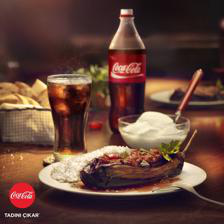

In [78]:
Image.open(((path/'train_images').ls())[10])

In [99]:
text = "new_cola (10).jpg"
re.findall(r'_(\w+)\s*\(', text)


['cola']

In [88]:

brands = ['cola', 'pepsi']
def get_brand_from_filename (image_name):
    image_name = image_name.name.lower()
    for brand in brands:
        if brand in image_name:
            return brand
        else:
            return 'unknown'

In [90]:
all_file = get_image_files(path/'train_images')
get_brand_from_filename(all_file[0])

'cola'

In [101]:
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    
    # فقط از پوشه train برای ساختن دیتاست استفاده می‌کنیم
    get_items=get_image_files, 
    
    # پوشه train را به صورت تصادفی به دو بخش آموزش و اعتبارسنجی تقسیم می‌کنیم
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    
    # برچسب را از نام فایل می‌گیریم
    get_y=using_attr(RegexLabeller(r'_(\w+)\s*\('), 'name'), 
    
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

data_block.summary(path/'train_images')

Setting-up type transforms pipelines
Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\images\pepsi-cocacola-images\train_images\new_cola (99).jpg.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\images\pepsi-cocacola-images\train_images\new_cola (99).jpg.jpg
    applying partial gives
      cola
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 470 items
2 datasets of sizes 376,94
Setting up Pi

In [102]:
dls = data_block.dataloaders(path/'train_images')

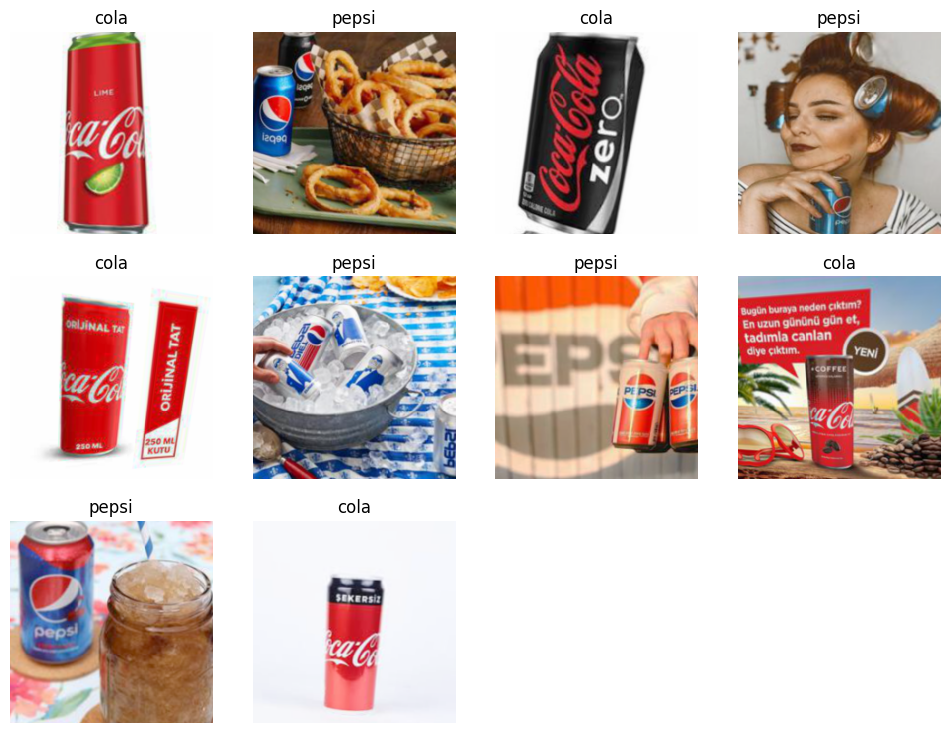

In [103]:
dls.show_batch(max_n = 10, nrows = 3)

Here, we used unique=True to have the same image repeated with different versions
of this RandomResizedCrop transform.

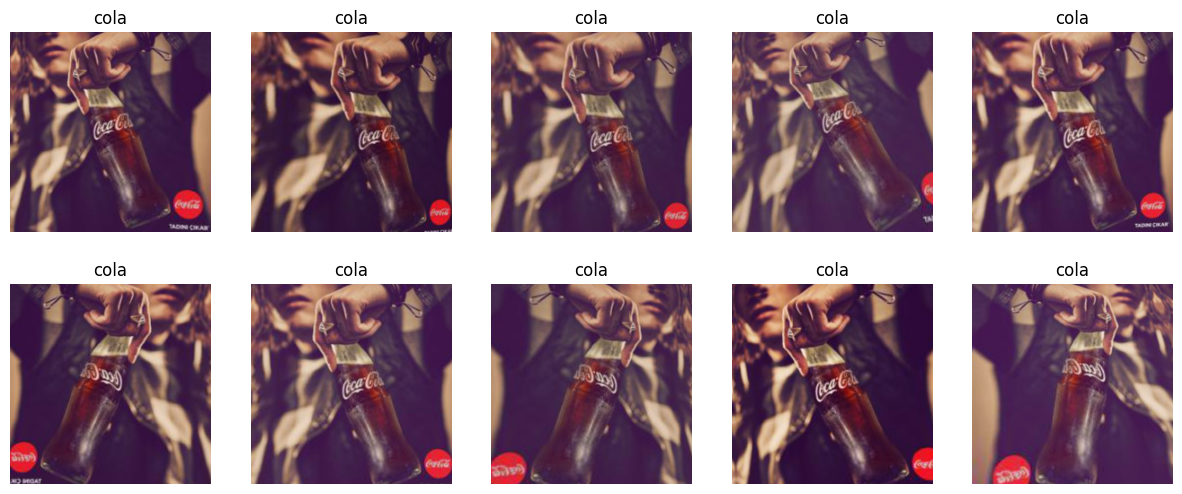

In [107]:
dls.train.show_batch(max_n = 10, nrows = 2, unique = True)

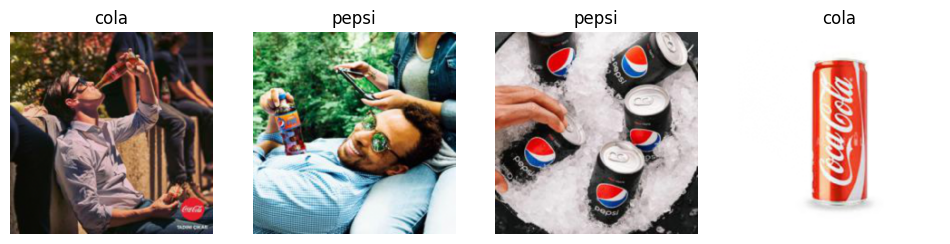

In [108]:
dls.valid.show_batch(max_n=4, nrows=1)

In [109]:
learner = vision_learner(dls , resnet34, metrics = error_rate)

In [110]:
x,y = dls.one_batch()

In [112]:
y

TensorCategory([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0])

In [117]:
preds = learner.get_preds(dl = [(x,y)])
preds[0]

tensor([[9.9950e-01, 4.9607e-04],
        [9.9988e-01, 1.2466e-04],
        [9.9899e-01, 1.0110e-03],
        [9.9947e-01, 5.3309e-04],
        [9.9970e-01, 3.0121e-04],
        [9.9782e-01, 2.1787e-03],
        [9.9689e-01, 3.1057e-03],
        [9.9865e-01, 1.3505e-03],
        [9.9873e-01, 1.2668e-03],
        [9.9873e-01, 1.2669e-03],
        [9.9954e-01, 4.6183e-04],
        [9.9123e-01, 8.7741e-03],
        [9.9781e-01, 2.1859e-03],
        [9.7252e-01, 2.7484e-02],
        [9.9863e-01, 1.3705e-03],
        [9.9992e-01, 7.5753e-05],
        [9.9249e-01, 7.5062e-03],
        [9.9945e-01, 5.5441e-04],
        [9.9957e-01, 4.3125e-04],
        [9.9994e-01, 5.5635e-05],
        [9.9159e-01, 8.4108e-03],
        [9.9990e-01, 9.5452e-05],
        [9.9864e-01, 1.3602e-03],
        [9.8481e-01, 1.5195e-02],
        [9.9519e-01, 4.8078e-03],
        [9.9616e-01, 3.8370e-03],
        [9.8704e-01, 1.2957e-02],
        [9.9904e-01, 9.6054e-04],
        [9.9802e-01, 1.9752e-03],
        [9.959

Improving Our Model

fining best learning rate..


AttributeError: 'SuggestedLRs' object has no attribute 'steepest'

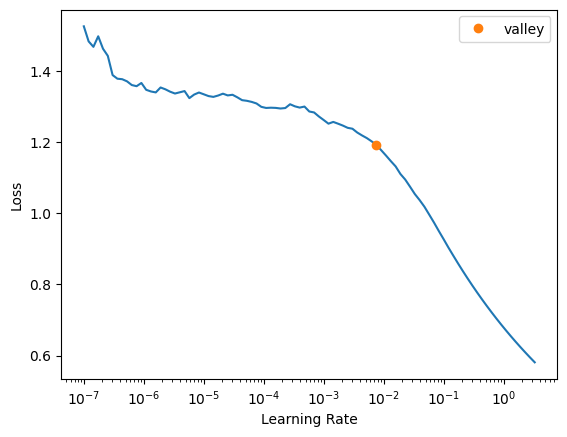

In [ ]:
print("fining best learning rate..")
suggested_lrs = learner.lr_find()

In [ ]:
learner.fine_tune(4, base_lr= 2e-2)

epoch,train_loss,valid_loss,error_rate,time
